In [1]:
import os
import numpy as np
import cv2
from sklearn.preprocessing import LabelBinarizer
from tqdm import tqdm

# Set directories
base_dir = "C:\\Users\\HP\\Downloads\\Dataset_Alzheimer23"
class_dirs = {
    "Mild-Demented": os.path.join(base_dir, "Mild_Demented"),
    "Moderate-Demented": os.path.join(base_dir, "Moderate_Demented"),
    "Non-Demented": os.path.join(base_dir, "Non_Demented"),
    "VeryMild-Demented": os.path.join(base_dir, "Very_Mild_Demented")
}

# Define preprocessing parameters
target_size = (128, 128)  # Standardized for better model performance
batch_size = 16  # Matches typical model input batch size

# Initialize LabelBinarizer
lb = LabelBinarizer()
lb.fit(["Demented", "Non-Demented"])  # Fit only once globally

# Generator function to yield batches
def image_generator():
    images = []
    labels = []
    valid_extensions = (".jpg", ".png", ".jpeg")

    for class_name, class_dir in class_dirs.items():
        for img_file in tqdm(os.listdir(class_dir), desc=f'Processing {class_name}'):
            if not img_file.lower().endswith(valid_extensions):
                continue  # Skip non-image files
            
            img_path = os.path.join(class_dir, img_file)
            img = cv2.imread(img_path)

            # Resize using bicubic interpolation
            img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_CUBIC)

            # Convert to grayscale for CLAHE
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            img_clahe = clahe.apply(img_gray)

            # Normalize using min-max scaling (safer than mean-std)
            img_normalized = cv2.normalize(img_clahe, None, 0, 255, cv2.NORM_MINMAX)

            # Convert back to 3-channel format for CNN models
            img_final = cv2.cvtColor(img_normalized.astype(np.uint8), cv2.COLOR_GRAY2BGR)

            # Assign labels
            label = "Demented" if class_name in ["Mild-Demented", "Moderate-Demented", "VeryMild-Demented"] else "Non-Demented"

            images.append(img_final)
            labels.append(label)

            # Yield batch
            if len(images) == batch_size:
                yield np.array(images), lb.transform(labels)
                images, labels = [], []  # Reset for next batch

    # Yield remaining images if any
    if images:
        yield np.array(images), lb.transform(labels)

# Example usage
for batch_images, batch_labels in image_generator():
    print(f"Batch images shape: {batch_images.shape}")
    print(f"Batch labels shape: {batch_labels.shape}")
# Define source directory paths


Processing Mild-Demented:  13%|███████                                              | 120/896 [00:00<00:01, 595.73it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  31%|████████████████▌                                    | 279/896 [00:00<00:00, 695.83it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  48%|█████████████████████████▍                           | 429/896 [00:00<00:00, 722.56it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  66%|██████████████████████████████████▉                  | 591/896 [00:00<00:00, 738.47it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  84%|████████████████████████████████████████████▍        | 751/896 [00:01<00:00, 740.27it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented: 100%|█████████████████████████████████████████████████████| 896/896 [00:01<00:00, 709.81it/s]


Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Moderate-Demented: 100%|███████████████████████████████████████████████████| 64/64 [00:00<00:00, 778.47it/s]


Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   0%|                                                                | 0/3200 [00:00<?, ?it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   2%|█▎                                                    | 75/3200 [00:00<00:04, 683.52it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   5%|██▋                                                  | 159/3200 [00:00<00:04, 713.42it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   7%|███▊                                                 | 231/3200 [00:00<00:04, 688.83it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  10%|█████                                                | 308/3200 [00:00<00:04, 695.31it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  12%|██████▎                                              | 378/3200 [00:00<00:04, 690.07it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  14%|███████▍                                             | 447/3200 [00:00<00:04, 684.50it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  16%|████████▌                                            | 516/3200 [00:00<00:04, 621.70it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  18%|█████████▌                                           | 579/3200 [00:00<00:04, 595.55it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  20%|██████████▋                                          | 642/3200 [00:01<00:04, 586.78it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  22%|███████████▋                                         | 702/3200 [00:01<00:04, 584.08it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  24%|████████████▌                                        | 761/3200 [00:01<00:04, 583.31it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  26%|█████████████▌                                       | 820/3200 [00:01<00:04, 557.77it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  28%|██████████████▌                                      | 881/3200 [00:01<00:04, 552.97it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  30%|███████████████▋                                     | 946/3200 [00:01<00:04, 555.86it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  31%|████████████████▎                                   | 1003/3200 [00:01<00:03, 558.44it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  33%|█████████████████▎                                  | 1063/3200 [00:01<00:03, 547.46it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  37%|███████████████████                                 | 1173/3200 [00:02<00:04, 476.86it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  40%|█████████████████████                               | 1296/3200 [00:02<00:03, 521.34it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  44%|██████████████████████▉                             | 1412/3200 [00:02<00:03, 548.32it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  48%|████████████████████████▊                           | 1530/3200 [00:02<00:02, 567.83it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  52%|███████████████████████████▏                        | 1674/3200 [00:02<00:02, 641.25it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  55%|████████████████████████████▎                       | 1746/3200 [00:02<00:02, 662.77it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  57%|█████████████████████████████▍                      | 1813/3200 [00:03<00:02, 664.28it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  59%|██████████████████████████████▋                     | 1886/3200 [00:03<00:01, 682.46it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  61%|███████████████████████████████▊                    | 1955/3200 [00:03<00:01, 670.08it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  65%|█████████████████████████████████▉                  | 2088/3200 [00:03<00:01, 615.00it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  69%|███████████████████████████████████▉                | 2214/3200 [00:03<00:01, 582.81it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  73%|█████████████████████████████████████▉              | 2336/3200 [00:03<00:01, 592.59it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  77%|████████████████████████████████████████▏           | 2476/3200 [00:04<00:01, 629.06it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  83%|███████████████████████████████████████████▏        | 2658/3200 [00:04<00:00, 747.02it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  88%|█████████████████████████████████████████████▉      | 2827/3200 [00:04<00:00, 772.89it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  93%|████████████████████████████████████████████████▍   | 2982/3200 [00:04<00:00, 693.36it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  95%|█████████████████████████████████████████████████▌  | 3053/3200 [00:04<00:00, 639.39it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented: 100%|████████████████████████████████████████████████████| 3200/3200 [00:05<00:00, 606.79it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)



Processing VeryMild-Demented:   6%|██▊                                             | 132/2240 [00:00<00:03, 654.65it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  12%|█████▉                                          | 277/2240 [00:00<00:02, 681.53it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  19%|█████████                                       | 425/2240 [00:00<00:02, 712.14it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  26%|████████████▎                                   | 574/2240 [00:00<00:02, 694.31it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  32%|███████████████▍                                | 720/2240 [00:01<00:02, 710.39it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  39%|██████████████████▌                             | 864/2240 [00:01<00:01, 690.76it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  45%|█████████████████████                          | 1004/2240 [00:01<00:01, 653.55it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  51%|███████████████████████▊                       | 1135/2240 [00:01<00:01, 611.24it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  54%|█████████████████████████▏                     | 1203/2240 [00:01<00:01, 610.20it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  60%|████████████████████████████▍                  | 1355/2240 [00:02<00:01, 664.87it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  67%|███████████████████████████████▋               | 1510/2240 [00:02<00:01, 709.51it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  75%|███████████████████████████████████▎           | 1684/2240 [00:02<00:00, 767.10it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  82%|██████████████████████████████████████▌        | 1840/2240 [00:02<00:00, 663.07it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  85%|████████████████████████████████████████       | 1909/2240 [00:02<00:00, 587.66it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  91%|██████████████████████████████████████████▋    | 2033/2240 [00:03<00:00, 521.65it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  93%|███████████████████████████████████████████▊   | 2088/2240 [00:03<00:00, 432.64it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  98%|█████████████████████████████████████████████▊ | 2184/2240 [00:03<00:00, 399.52it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented: 100%|███████████████████████████████████████████████| 2240/2240 [00:03<00:00, 605.92it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


In [2]:
import os
import shutil
import random
import numpy as np
from tqdm import tqdm
from PIL import Image

source_dirs = {
    "Demented": [
        "C:\\Users\\HP\\Downloads\\Dataset_Alzheimer23\\Mild_Demented",
        "C:\\Users\\HP\\Downloads\\Dataset_Alzheimer23\\Moderate_Demented",
        "C:\\Users\\HP\\Downloads\\Dataset_Alzheimer23\\Very_Mild_Demented"
    ],
    "Non-Demented": ["C:\\Users\\HP\\Downloads\\Dataset_Alzheimer23\\Non_Demented"]
}

# Define target directories
new_base_dir = "D:\\Alzheimer_Inception_v3New"
train_dir = os.path.join(new_base_dir, "train")
test_dir = os.path.join(new_base_dir, "test")
train_demented_dir = os.path.join(train_dir, "Demented")
train_nondemented_dir = os.path.join(train_dir, "Non-Demented")
test_demented_dir = os.path.join(test_dir, "Demented")
test_nondemented_dir = os.path.join(test_dir, "Non-Demented")


# Create directories if they don't exist
for dir_path in [train_demented_dir, train_nondemented_dir, test_demented_dir, test_nondemented_dir]:
    os.makedirs(dir_path, exist_ok=True)

# Function to shuffle and split data
def shuffle_and_split_data(source_dirs, train_dir, test_dir, split_ratio=0.8):
    all_images = []
    valid_extensions = (".jpg", ".png", ".jpeg")

    for source_dir in source_dirs:
        for sub_dir in (source_dir if isinstance(source_dir, list) else [source_dir]):
            for img_file in os.listdir(sub_dir):
                if img_file.lower().endswith(valid_extensions):
                    all_images.append(os.path.join(sub_dir, img_file))

    # Shuffle images
    random.shuffle(all_images)

    # Split data
    split_point = int(len(all_images) * split_ratio)
    train_images, test_images = all_images[:split_point], all_images[split_point:]

    # Copy images
    for img_path in tqdm(train_images, desc=f'Copying to {train_dir}'):
        shutil.copy(img_path, train_dir)
    
    for img_path in tqdm(test_images, desc=f'Copying to {test_dir}'):
        shutil.copy(img_path, test_dir)
    
    return train_images, test_images

# Split and copy data
train_demented, test_demented = shuffle_and_split_data(source_dirs["Demented"], train_demented_dir, test_demented_dir)
train_nondemented, test_nondemented = shuffle_and_split_data(source_dirs["Non-Demented"], train_nondemented_dir, test_nondemented_dir)

# Load images without augmentation
def load_images(image_paths, label):
    images = []
    labels = []
    
    for img_path in tqdm(image_paths, desc=f'Loading {label} images'):
        try:
            img = Image.open(img_path).convert("RGB").resize((128, 128))
            img_array = np.array(img)
            
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
    
    return np.array(images), np.array(labels)

# Load training and testing data
X_train_demented, y_train_demented = load_images(train_demented, label=1)
X_train_nondemented, y_train_nondemented = load_images(train_nondemented, label=0)
X_test_demented, y_test_demented = load_images(test_demented, label=1)
X_test_nondemented, y_test_nondemented = load_images(test_nondemented, label=0)

# Combine training data
X_train = np.concatenate([X_train_demented, X_train_nondemented], axis=0)
y_train = np.concatenate([y_train_demented, y_train_nondemented], axis=0)

# Combine testing data
X_test = np.concatenate([X_test_demented, X_test_nondemented], axis=0)
y_test = np.concatenate([y_test_demented, y_test_nondemented], axis=0)

# Shuffle data
indices_train = np.arange(len(X_train))
indices_test = np.arange(len(X_test))
np.random.shuffle(indices_train)
np.random.shuffle(indices_test)

X_train, y_train = X_train[indices_train], y_train[indices_train]
X_test, y_test = X_test[indices_test], y_test[indices_test]

# Normalize images (convert pixel values to [0,1])
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Print dataset summary
print(f"Training - Demented: {len(y_train_demented)}, Non-Demented: {len(y_train_nondemented)}")
print(f"Testing - Demented: {len(y_test_demented)}, Non-Demented: {len(y_test_nondemented)}")
print("Dataset successfully split and loaded!")


Copying to D:\Alzheimer_Inception_v3New\train\Demented: 100%|█████████████████████| 2560/2560 [00:08<00:00, 315.83it/s]
Copying to D:\Alzheimer_Inception_v3New\test\Demented: 100%|████████████████████████| 640/640 [00:01<00:00, 350.10it/s]
Copying to D:\Alzheimer_Inception_v3New\train\Non-Demented: 100%|█████████████████| 2560/2560 [00:07<00:00, 355.88it/s]
Copying to D:\Alzheimer_Inception_v3New\test\Non-Demented: 100%|████████████████████| 640/640 [00:01<00:00, 343.56it/s]
Loading 0 images: 100%|█████████████████████████████████████████████████████████████| 640/640 [00:00<00:00, 734.15it/s]


Training - Demented: 2560, Non-Demented: 2560
Testing - Demented: 640, Non-Demented: 640
Dataset successfully split and loaded!


Epoch 1/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 659s 4s/step - accuracy: 0.5598 - loss: 0.8842 - val_accuracy: 0.5336 - val_loss: 0.7296 - learning_rate: 1.0000e-04
Epoch 2/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 619s 4s/step - accuracy: 0.6800 - loss: 0.6829 - val_accuracy: 0.6336 - val_loss: 0.6574 - learning_rate: 1.0000e-04
Epoch 3/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 557s 3s/step - accuracy: 0.7524 - loss: 0.5598 - val_accuracy: 0.7117 - val_loss: 0.6101 - learning_rate: 1.0000e-04
Epoch 4/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 534s 3s/step - accuracy: 0.8454 - loss: 0.3778 - val_accuracy: 0.8016 - val_loss: 0.4906 - learning_rate: 1.0000e-04
Epoch 5/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 550s 3s/step - accuracy: 0.9126 - loss: 0.2252 - val_accuracy: 0.8945 - val_loss: 0.2855 - learning_rate: 1.0000e-04
Epoch 6/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 410s 3s/step - accuracy: 0.9444 - loss: 0.1357 - val_accuracy: 0.8938 - val_loss: 0.2641 - learning_rate: 1.0000e-04
Epoch 7/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 404s 3s/step - acc

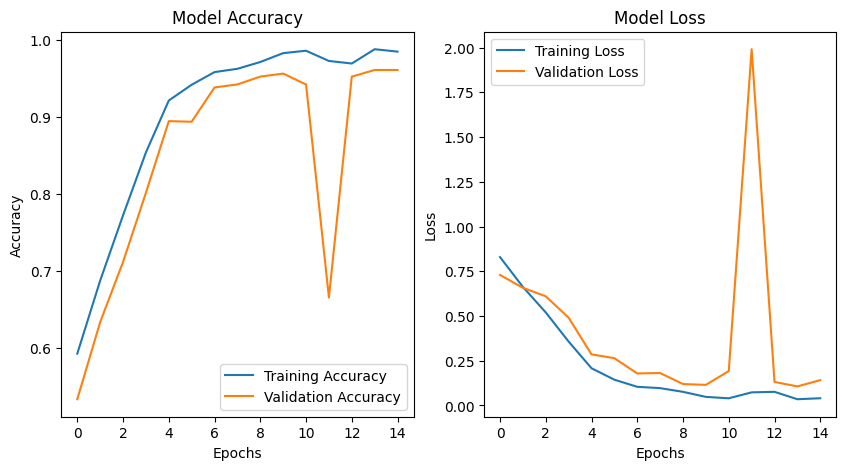

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define parameters
input_shape = (128, 128, 3)
epochs = 15
learning_rate = 0.0001

# Initialize InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)  # Helps in stable training
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze some layers in the base model
for layer in base_model.layers[-50:]:  # Unfreezing the last 50 layers
    layer.trainable = True

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Add callbacks for early stopping and dynamic learning rate adjustment
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Save the model
model.save("Alzheimer_InceptionV3.h5")

# Plot Training Accuracy & Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 494ms/step
Accuracy: 0.9609
Precision: 0.9638
Recall: 0.9578
F1-Score: 0.9608
Confusion Matrix:
[[617  23]
 [ 27 613]]


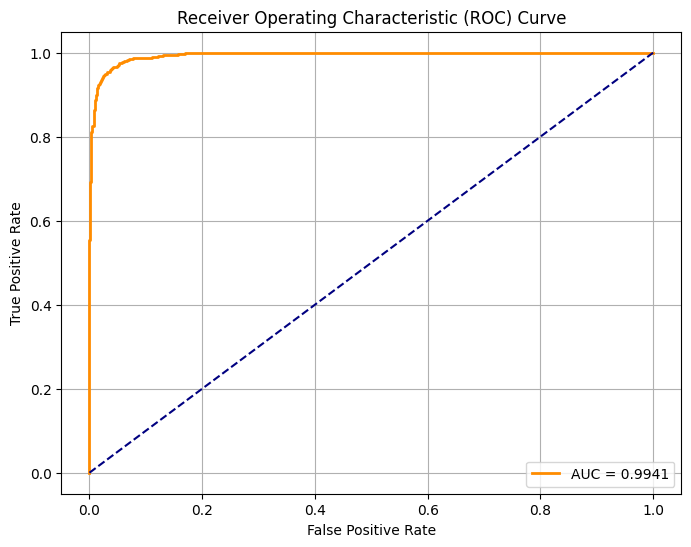

In [5]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt

# Predict probabilities and binary labels
y_probs = model.predict(X_test)  # probabilities
y_pred = (y_probs > 0.5).astype(int)  # binary predictions

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

# ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Found 5120 images belonging to 2 classes.
Found 1280 images belonging to 2 classes.


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 672s 4s/step - accuracy: 0.5340 - loss: 0.9201 - val_accuracy: 0.6438 - val_loss: 0.6475 - learning_rate: 1.0000e-04
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 581s 4s/step - accuracy: 0.6211 - loss: 0.7894 - val_accuracy: 0.6578 - val_loss: 0.6318 - learning_rate: 1.0000e-04
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 573s 4s/step - accuracy: 0.6014 - loss: 0.7575 - val_accuracy: 0.6766 - val_loss: 0.6235 - learning_rate: 1.0000e-04
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 566s 4s/step - accuracy: 0.6415 - loss: 0.7252 - val_accuracy: 0.6953 - val_loss: 0.5919 - learning_rate: 1.0000e-04
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 575s 4s/step - accuracy: 0.6343 - loss: 0.7180 - val_accuracy: 0.7391 - val_loss: 0.5319 - learning_rate: 1.0000e-04
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 610s 4s/step - accuracy: 0.6760 - loss: 0.6619 - val_accuracy: 0.7367 - val_loss: 0.5443 - learning_rate: 1.0000e-04
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 575s 4s/step - acc

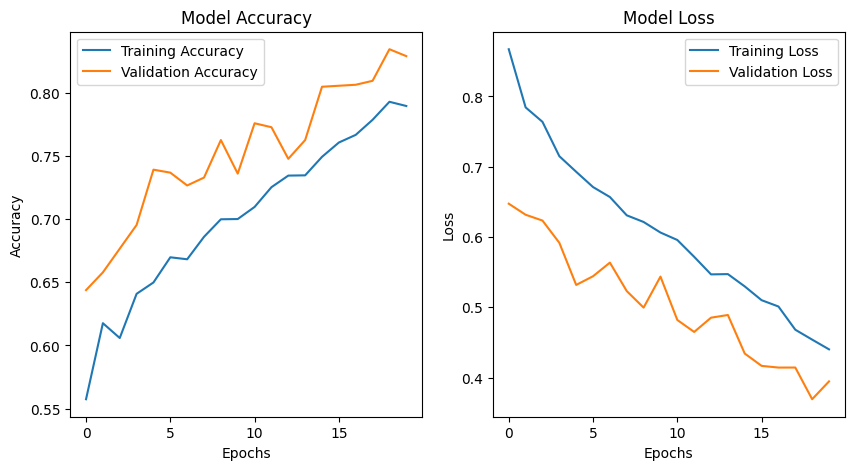

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define parameters
input_shape = (128, 128, 3)
batch_size = 32
epochs = 20  # Increased epochs to account for augmentation
learning_rate = 0.0001

# **Apply Data Augmentation**
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize images
    rotation_range=20,  # Random rotation up to 20 degrees
    width_shift_range=0.2,  # Shift width by 20%
    height_shift_range=0.2,  # Shift height by 20%
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Flip images horizontally
    brightness_range=[0.8, 1.2],  # Adjust brightness
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale for test images

# **Prepare Image Generators**
train_dir = "C:\\Users\\HP\\Downloads\\Alzheimer_Feb_Tuesday\\train"
test_dir = "C:\\Users\\HP\\Downloads\\Alzheimer_Feb_Tuesday\\test"

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False  # No need to shuffle test data
)

# **Load Pretrained InceptionV3 Model**
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# **Add Custom Fully Connected Layers**
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)  # Helps in stable training
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification (Demented/Non-Demented)

# **Define Model**
model = Model(inputs=base_model.input, outputs=predictions)

# **Unfreeze Last Few Layers for Fine-Tuning**
for layer in base_model.layers[-50:]:  # Unfreezing the last 50 layers
    layer.trainable = True

# **Compile Model**
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# **Add Callbacks for Better Training**
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# **Train the Model**
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs,
    callbacks=[early_stopping, lr_scheduler]
)

# **Save the Model**
model.save("Alzheimer_InceptionV3_Augmented.h5")

# **Plot Training Accuracy & Validation Accuracy**
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# **Plot Training Loss & Validation Loss**
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [2]:
from sklearn.metrics import classification_report, confusion_matrix

# **Evaluate Model on Test Data**
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# **Generate Predictions**
y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

# **Get True Labels**
y_true = test_generator.classes

# **Classification Report**
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))


40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 504ms/step - accuracy: 0.8652 - loss: 0.3407
Test Accuracy: 83.44%
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 543ms/step
Classification Report:
              precision    recall  f1-score   support

    Demented       0.82      0.85      0.84       640
Non-Demented       0.85      0.82      0.83       640

    accuracy                           0.83      1280
   macro avg       0.83      0.83      0.83      1280
weighted avg       0.83      0.83      0.83      1280



In [3]:
# **Confusion Matrix**
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

Confusion Matrix:
[[546  94]
 [118 522]]
